In [1]:
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import numpy as np

from tqdm.autonotebook import tqdm

/tmp/ipykernel_23435/1545399670.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
csv_path = Path(r'/home/user/Documents/DTU/Fall_23/Advanced_dl_for_cv/doofLearning/data/raw/archive/Food Ingredients and Recipe Dataset with Image Name Mapping.csv')
images_path = Path(r'/home/user/Documents/DTU/Fall_23/Advanced_dl_for_cv/doofLearning/data/raw/archive/Food Images/Food Images')

In [3]:
recipes_df = pd.read_csv(csv_path, index_col=0)

In [4]:
recipes_df.head(5)

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [6]:
idx = 10356

row = recipes_df.iloc[idx]

title = row.Title
ingredients = row.Cleaned_Ingredients
dirty_ingredients = row.Ingredients
instructions = row.Instructions
img_name = row.Image_Name


In [7]:
print(title)
print(ingredients)
print(instructions)
print(img_name)

Royal Icing
['Using electric mixer', 'beat 3 1/4 cups powdered sugar and egg whites until thick and shiny', 'adding more powdered sugar by tablespoonfuls if mixture is too thin to spread', 'about 3 minutes. Add lemon juice. Divide icing into portions', 'if desired', 'and add different food coloring to each. Cover until ready to use.']
nan
royal-icing-240751


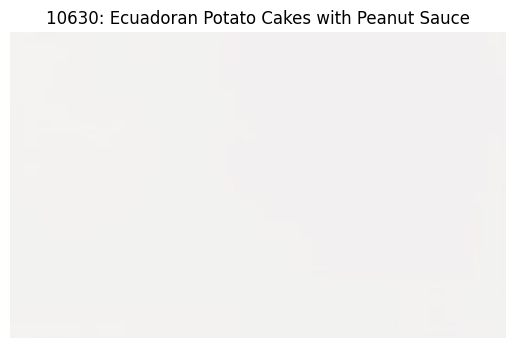

In [24]:
img_path = images_path / (img_name+'.jpg')
img = Image.open(img_path)
plt.imshow(img)
plt.title(f"{idx}: {title}")
plt.axis('off')
plt.show()

In [25]:
import skimage.measure    
entropy = skimage.measure.shannon_entropy(img)

In [26]:
entropy

1.9143544907157877

The square brackets in the ingredients is actually a character:

In [11]:
type(ingredients)

str

What is the difference between cleaned and not-cleaned ingredient columns?

In [10]:
print(ingredients)
print(dirty_ingredients)

['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash (about 3 lb. total)', '2 Tbsp. finely chopped sage', '1 Tbsp. finely chopped rosemary', '6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature', '¼ tsp. ground allspice', 'Pinch of crushed red pepper flakes', 'Freshly ground black pepper', '⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)', '2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces', '2 Tbsp. extra-virgin olive oil', '½ small red onion, thinly sliced', '3 Tbsp. apple cider vinegar', '1 Tbsp. white miso', '¼ cup all-purpose flour', '2 Tbsp. unsalted butter, room temperature', '¼ cup dry white wine', '2 cups unsalted chicken broth', '2 tsp. white miso', 'Kosher salt', 'freshly ground pepper']
['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash (about 3 lb. total)', '2 Tbsp. finely chopped sage', '1 Tbsp. finely chop

In [11]:
dirty_ingredients==ingredients

False

Small differences. Some sentences in the dirty version are ot separated well. They look similar nonetheless. Maybe return later

Are there recipes that do not have corresponding images?

In [ ]:
img_ = np.asarray(img)

vals, _ = np.histogram()

In [31]:
from PIL import Image

img_no_info = []
img_bad_idx = []
for i in tqdm(range(len(recipes_df))):
    row = recipes_df.iloc[i]
    img_path = images_path / (row.Image_Name+'.jpg')
    try:
        img_=Image.open(img_path)
        entropy = skimage.measure.shannon_entropy(img_)
        if entropy<4.5:
            print(f"No info {i}: {row.Title}")
            img_no_info.append(i)
        
    except FileNotFoundError:
#         print(f"{i}: {row.Title}")
        img_bad_idx.append(i)

  0%|          | 0/13501 [00:00<?, ?it/s]

No info 41: Iced Café de Olla
No info 182: Ranch Fun Dip
No info 210: Sour Cream and Onion Biscuits
No info 526: Instant Pot Red Bean and Quinoa Soup with Taco Fixins
No info 734: Pickled Hot Chiles
No info 779: Coconut Cold Brew Coffee
No info 796: Ginger + Greens Smoothie
No info 824: Mezcal Sour
No info 870: Cold Toddy
No info 989: Garlic-Chile Vinegar
No info 1107: Yellow Tomato Bloody Mary
No info 1644: Cast-Iron Roast Chicken with Fennel and Carrots
No info 1770: E.L.T. (Egg, Lettuce, and Tomato Sandwich)
No info 1775: Crunchy Salty Lemony Salad
No info 1886: Boozy Concord-Grape Ice Pops
No info 2088: Perfect Poached Eggs
No info 2169: Grapefruit Marmalade with Vanilla and Anise
No info 2182: Preserved Lemons
No info 2183: Moneygun Hot Toddy
No info 2184: Mixed Citrus Daiquiri
No info 2509: Kohlrabi Pickles With Chile Oil
No info 2518: Mashed Kohlrabi With Brown Butter
No info 2623: Salted Butterscotch
No info 2675: Iced Coffee Shakerato
No info 2720: Spicy Confit Chiles
No info 

No info 9644: Mixed Berry and Cassis Sundaes
No info 9673: Porterhouse Steak with Pan Seared Cherry Tomatoes
No info 9687: Pappardelle with Chicken and Mushroom Ragù
No info 9690: Zucchini Köfte with Beet-Bulgur Pilaf
No info 9701: Peppery Fig and Cider Compote
No info 9745: Steak with Parmesan Butter, Balsamic Glaze, and Arugula
No info 9776: Fried Mozzerella with Arugula and Prosciutto
No info 9779: Roasted Tomatoes and Onions with Fresh Ricotta
No info 9795: Cheddar Burgers with Balsamic Onions and Chipotle Ketchup
No info 9796: Asian Pork and Mushroom Burger Wraps
No info 9797: Curried Lamb Burgers with Grilled Vegetables and Mint Raita
No info 9834: Strawberry Shortcakes
No info 9868: Sesame Soba Noodles with Cucumber, Bok Choy, and Mixed Greens
No info 9908: Chile Peanuts
No info 9917: Aromatic Braised Chicken with Fried Onions
No info 10080: Frozen Apricot Soufflé
No info 10083: Vegetarian Cassoulet
No info 10091: Bouillabaisse, Simplified
No info 10152: Roasted Cod with Shiitak

In [29]:
print(len(img_bad_idx), 'recipes with bad image path')

30 recipes with bad image path


In [32]:
len(img_no_info)

276

Will address this fact when building the processed dataset

There is also another thing: Some text fields might have bad formatting:

In [33]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13501 entries, 0 to 13500
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                13496 non-null  object
 1   Ingredients          13501 non-null  object
 2   Instructions         13493 non-null  object
 3   Image_Name           13501 non-null  object
 4   Cleaned_Ingredients  13501 non-null  object
dtypes: object(5)
memory usage: 632.9+ KB


In [34]:
recipes_df.describe()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
count,13496,13501,13493,13501,13501
unique,13305,13473,13464,13472,13473
top,Potato Latkes,[],Place ingredients in blender in the order list...,#NAME?,['']
freq,5,12,5,30,12


Find bad titles, ingredients, instructions. The process is very similar to the images. Repeated since throwaway code in this notebook.

In [44]:
title_bad_idx = []
ingredients_bad_idx = []
instructions_bad_idx = []
for i in range(len(recipes_df)):
    row = recipes_df.iloc[i]
    if not row.Title:
        title_bad_idx.append(i)
    if not row.Cleaned_Ingredients or row.Cleaned_Ingredients=="['']":
        ingredients_bad_idx.append(i)
    if not row.Instructions:
        ingredients_bad_idx.append(i)

In [45]:
title_bad_idx, ingredients_bad_idx, instructions_bad_idx

([],
 [5606, 5699, 7058, 7863, 8059, 9350, 9636, 11221, 12373, 12378, 12818, 12829],
 [])

Try the newly created dataframes